Dataset shape: (10, 17)
   age          job  marital  education default  balance housing loan  \
0   30       admin.  married  secondary      no     1000     yes   no   
1   45   technician   single   tertiary      no      200     yes  yes   
2   39  blue-collar  married    primary      no      150      no   no   
3   25      student   single  secondary      no      500      no   no   
4   50   management  married   tertiary     yes     4000     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome    y  
0   cellular    5   may       100         1    999         0  unknown   no  
1   cellular   10   jun       200         2    999         0  unknown   no  
2  telephone   15   jul       150         1    999         0  unknown  yes  
3   cellular   20   aug       300         3    999         0  unknown   no  
4  telephone   25   nov       400         2      3         1  success  yes  

Data after encoding:
   age  job  marital  education  default  balance  ho

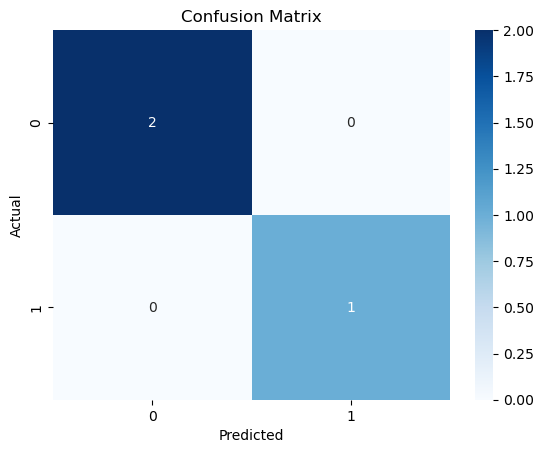

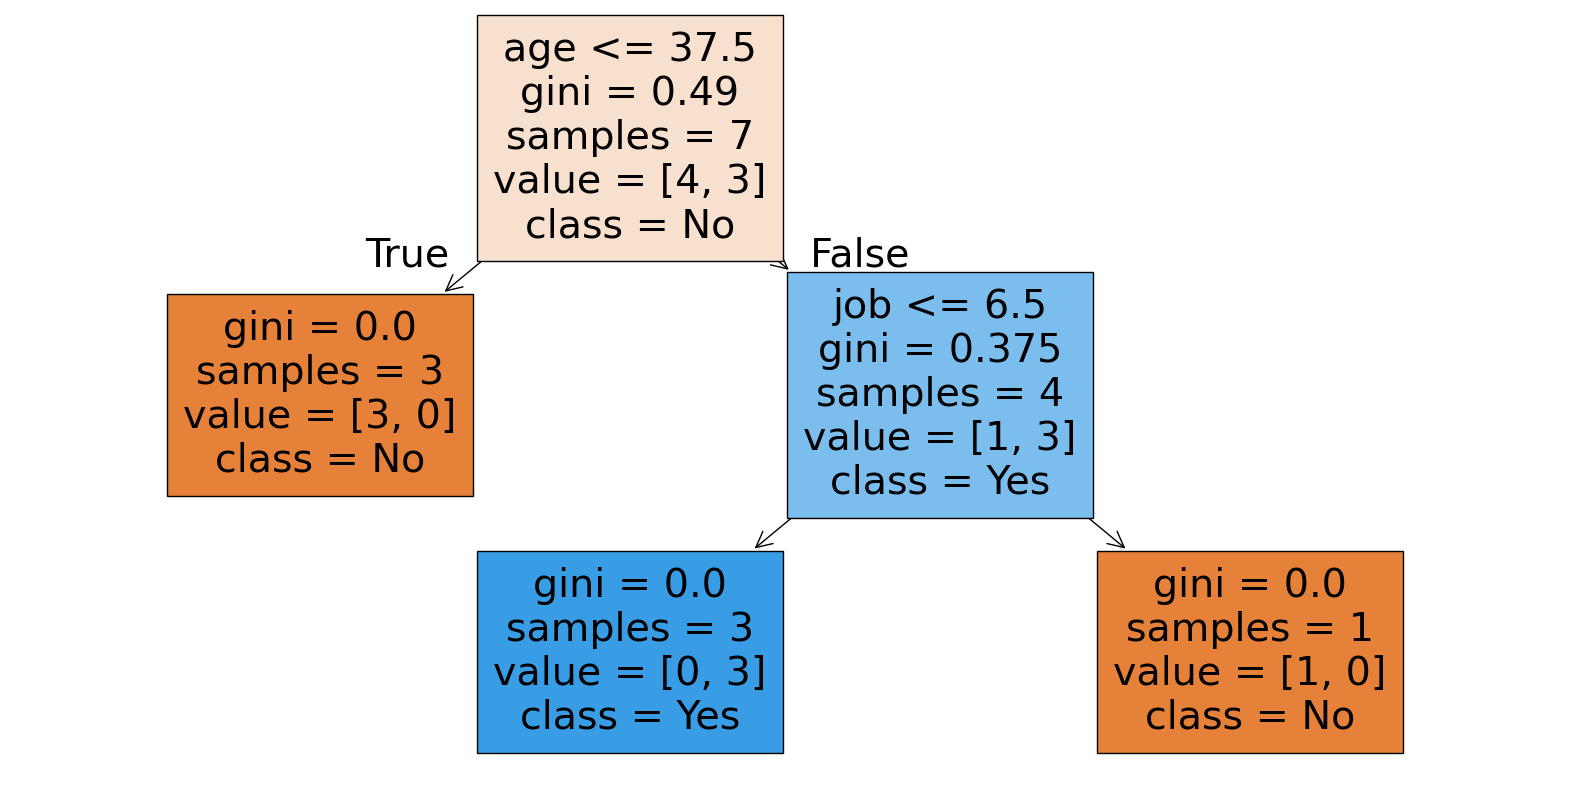

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
# Dataset link: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.csv
data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/bank.csv", sep=";")

print("Dataset shape:", data.shape)
print(data.head())

# Encode categorical variables
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

print("\nData after encoding:")
print(data.head())

# Features and target
X = data.drop("y", axis=1)   # independent variables
y = data["y"]                # target variable (0 = No, 1 = Yes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Build Decision Tree model
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()

In [ ]:
=0/